In [5]:
from sklearn.datasets import fetch_openml

import numpy as np
import pandas as pd

In [6]:
mnist = fetch_openml('mnist_784', version=1) # set asframe = False to import the dataset as nparray

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist['data'], mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [9]:
mnist[ 'DESCR']
# http://yann.lecun.com/exdb/mnist/

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [10]:
X.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 418.7 MB


In [12]:
Xarray = np.array(X)
Xarray.shape

(70000, 784)

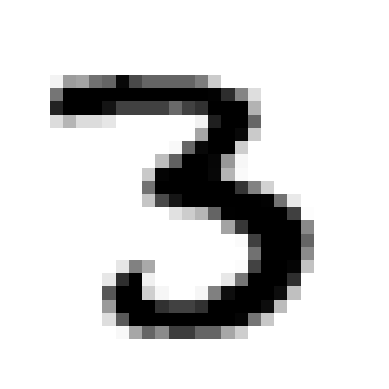

In [13]:
# to check the image map using matplotlib 

# to access some_digit as some row, data must be in an array form!

import matplotlib as mlb
import matplotlib.pylab as plt

some_digit = Xarray[12]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [14]:
y[12]
#stores labels as a string

'3'

In [15]:
# since original labels are stored as strings
y = y.astype(np.uint8)

In [16]:
y[13]

6

In [17]:
# test-train split is recommended to be 60k:10k by the creators

XT, Xt, yT, yt = X[:60000], X[60000:], y[:60000], y[60000:]

## Binary classification: is 3 or not

In [18]:
yT_3 = (yT==3)

yt_3 = (yt==3)

In [19]:
# barebone SGD classifier uses a linear kernel SVM loss function 
# SGD = stochastic gradient descent, it is just the optimization algorithm. 
# SGD classifier is a misnomer since the classification algo is SVM not SGD; but yeha whatever. 
# you can define the choice of classification algo as an argument called loss = '' while defining the object. 

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=15)
sgd_clf.fit(XT, yT_3)

SGDClassifier(random_state=15)

In [20]:
sgd_clf.predict([some_digit])

c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [21]:


sgd_clf.predict([Xarray[13]]) #6

c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

## Confusion matrix

Lets consider a different classifier. To create a confusion matrix, we need y_pred with target labels. For the next bit lets calculate y_pred using `cross_val_predict()` on `sgd_classifier`

In [22]:
from sklearn.model_selection import cross_val_predict

?cross_val_predict

Signature:
cross_val_predict(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch='2*n_jobs',
    method='predict',
)
Docstring:
Generate cross-validated estimates for each input data point.

The data is split according to the cv parameter. Each sample belongs
to exactly one test set, and its prediction is computed with an
estimator fitted on the corresponding training set.

Passing these predictions into an evaluation metric may not be a valid
way to measure generalization performance. Results can differ from
:func:`cross_validate` and :func:`cross_val_score` unless all tests sets
have equal size and the metric decomposes over samples.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator
    The estimator instance to use to fit the data. It must implement a `fit`
    method and the method given by the `method` parameter.

X : {array-

In [23]:
y_train_pred = cross_val_predict(sgd_clf, XT, yT_3, cv=5)

`cross_val_predict` working: use k-1 partitions for train and predict for kth partition; repeat k times, till prediction for each partition is made using remaining k-1 (leave one out)

In [24]:
np.sum(y_train_pred)

6556

In [25]:
from sklearn.metrics import confusion_matrix

c  = confusion_matrix(yT_3, y_train_pred)
print("confusion matrix = ", c)

from sklearn.metrics import f1_score

print('f1_score = ', f1_score(yT_3, y_train_pred))

confusion matrix =  [[52292  1577]
 [ 1152  4979]]
f1_score =  0.784897927011902


At the backend, y_score are assigned to each data point and based on a threshold, the __yes__ or __no__ classification happens. 

In [26]:
y_scores = cross_val_predict(sgd_clf, XT, yT_3, cv=5, method = 'decision_function')

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(yT_3, y_scores)

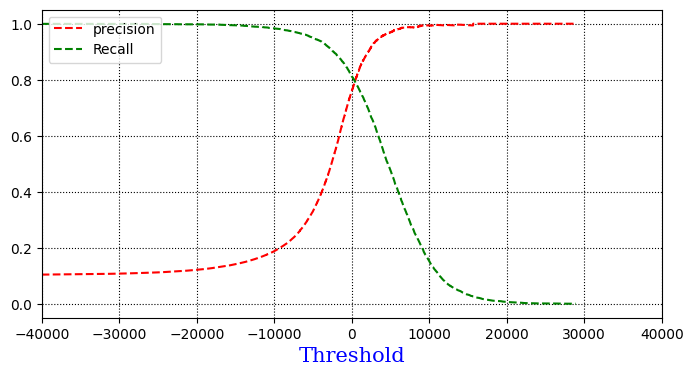

In [ ]:
font1 = {'family':'serif','color':'blue','size':15}

plt.figure(figsize=[8,4])

plt.xlim([-40000,40000]) # added later after looking at the squished default x-range

plt.plot(thresholds, precision[:-1], 'r--', label = 'precision')
plt.plot(thresholds, recall[:-1], 'g--', label = 'Recall')
plt.grid(visible =True, axis = 'both', linestyle = ':', color = 'black')
plt.legend(loc = 'upper left')
plt.xlabel('Threshold', fontdict=font1)
plt.show()

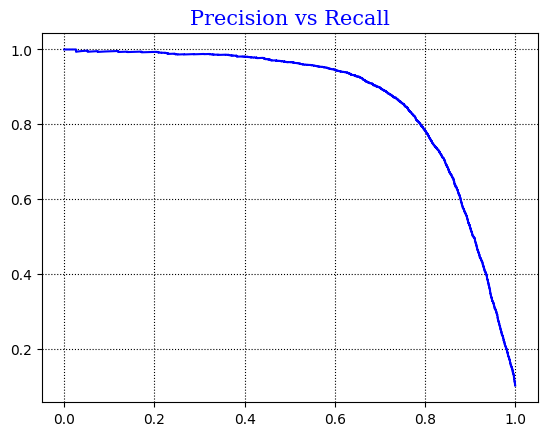

In [51]:
plt.plot(recall, precision, 'b-')
plt.title('Precision vs Recall', fontdict=font1)
plt.grid(visible =True, axis = 'both', linestyle = ':', color = 'black')

You can then play around with the threshold value corresponding to a particular point on the *precision-recall curve*. 

__Tip__: If someone says, “Let’s reach 99% precision,” you should ask, “At what recall?”


## Multiclass classification 

Moving on from 3 or not_3 (binary) classification. 

Main algos for multiclass classif: SGD classifier, naive bayes, random dorest, SVM

__OvO (one vs one):__ create multiple binary classifiers (nC2): 1 v 2, 1 v 3, 2 v 3 etc and check majority <br>
__OvR (one vs Rest):__ score for all classes, and prediction is the class with max score

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the
size of the training set. For these algorithms OvO is preferred because it is faster to
train many classifiers on small training sets than to train few classifiers on large train‐
ing sets. For most binary classification algorithms, however, OvR is preferred.

In [52]:
# SVM , default: OvO

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(XT, yT)

SVC()

Wow took 3 solid minutes to crunch 60k data points. 

In [53]:
svm_clf.predict([some_digit])

c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([3], dtype=uint8)

In [74]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [75]:
some_digit_scores = svm_clf.decision_function([some_digit])

for i in range(len(some_digit_scores[0])):
    print(i,'=', some_digit_scores[0][i])

# index manipulation is done to print it in the right order. No need to sweat over it. 

0 = 2.7075866020308057
1 = 1.7201337856228558
2 = 6.173424390383524
3 = 9.32029431027328
4 = 0.7039833138722458
5 = 8.281503735172874
6 = 0.6953396627294721
7 = 2.718917685520038
8 = 7.286498510450876
9 = 4.844006050168615


c:\Users\AN80050181\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Clearly score of 3 is maximum so 3 is the prediction. But note that score for 5 is also close. <br>

The actual image is as below:

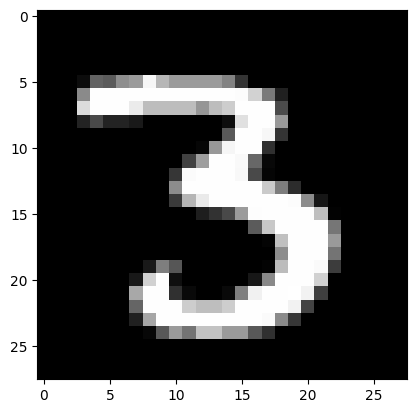

In [71]:
plt.imshow(some_digit_image, cmap='gist_grey')
plt.show()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### Lets see and example of OvR (one vs rest algorithm in action):

In [76]:
from sklearn.multiclass import OneVsRestClassifier

sgd_clasif_ovr = OneVsRestClassifier(SGDClassifier())

In [79]:
sgd_clasif_ovr.fit(XT, yT)

OneVsRestClassifier(estimator=SGDClassifier())

In [82]:
import warnings
warnings.simplefilter("ignore", UserWarning)

sgd_clasif_ovr.predict([some_digit])

array([3], dtype=uint8)

In [85]:
score_array = sgd_clasif_ovr.decision_function([some_digit])
score_array[0]

array([-33918.90227589, -33315.31811645,  -6858.16892631,   9132.64501555,
       -16043.91633019, -12679.97159181, -34220.94200022, -11172.10854553,
       -20085.7020439 , -44394.57740775])

So except the score for 3, all are largely negative meaning that the clf is quite sure it is a '3'.

Now lets check the performance of this classifier on the whole dataset using cross validation and `OVR sgd_classifier`

In [86]:
from sklearn.model_selection import cross_val_score

s = cross_val_score(sgd_clasif_ovr, XT, yT, cv=3)
print(s)

[0.86705 0.8748  0.8601 ]


So we already have 86 percent worst case accuracy using sgd_clf. Maybe other algorithms can improve it. 

What if we normalize the original data using standard scaler? The performance should ideally improve. Lets check: 

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XT_scaled = scaler.fit_transform(XT.astype(np.float64))

cross_val_score(sgd_clasif_ovr, XT_scaled, yT, cv = 3)

array([0.9013 , 0.89545, 0.89885])

Clearly the accuracies have become better simply by scaling the data by ~3%, touching 0.9.

Wow took a monstrous 6 min 30 s to train on a ~ 60,000*784 dataset, 3 times. Hmm.....

In [88]:
y_pred = cross_val_predict(sgd_clasif_ovr, XT_scaled, yT, cv = 3)

Just to see cucked we really are (precision, recall in higher dimensions)

In [93]:
cnfx_mat = confusion_matrix(yT, y_pred)
cnfx_mat

array([[5571,    0,   24,    5,    8,   53,   36,    6,  219,    1],
       [   0, 6400,   38,   23,    4,   45,    4,    7,  210,   11],
       [  29,   27, 5244,   91,   72,   25,   64,   39,  358,    9],
       [  21,   17,  119, 5229,    2,  214,   26,   38,  394,   71],
       [  11,   14,   48,   10, 5190,   12,   34,   25,  333,  165],
       [  26,   15,   32,  166,   54, 4466,   73,   14,  519,   56],
       [  30,   16,   44,    2,   43,   99, 5550,    3,  130,    1],
       [  19,   10,   52,   29,   50,   14,    3, 5697,  181,  210],
       [  17,   65,   49,   90,    3,  130,   24,   10, 5419,   44],
       [  22,   18,   30,   65,  117,   38,    1,  180,  369, 5109]],
      dtype=int64)

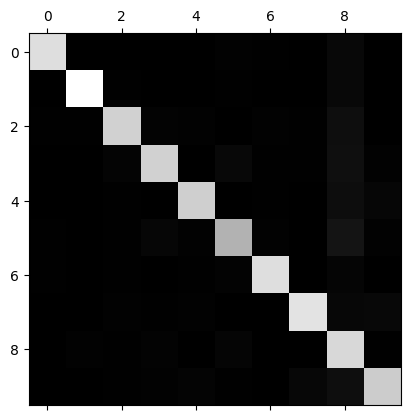

In [92]:
plt.matshow(cnfx_mat, cmap = plt.cm.gray)
plt.show()

In [104]:
_ , counts = np.unique(yT, return_counts=True)

counts

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)